In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# !pip install XGBoost

In [3]:
train_df = pd.read_csv('train.csv')

In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


(array([8.114e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <BarContainer object of 10 artists>)

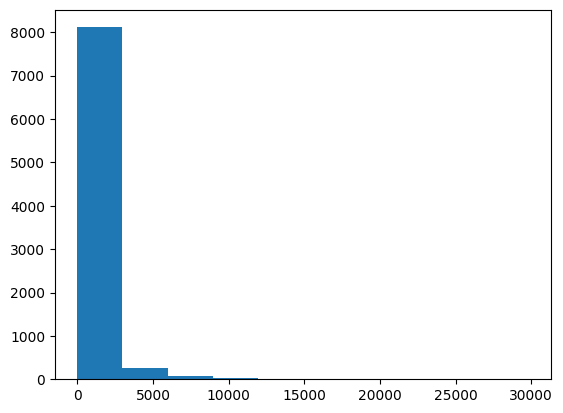

In [5]:
plt.hist(train_df['FoodCourt'])

(array([5572.,  245.,  236.,  283.,  307.,  437.,  717.,  427.,  241.,
          45.]),
 array([ 0.        ,  1.03027334,  2.06054667,  3.09082001,  4.12109334,
         5.15136668,  6.18164002,  7.21191335,  8.24218669,  9.27246002,
        10.30273336]),
 <BarContainer object of 10 artists>)

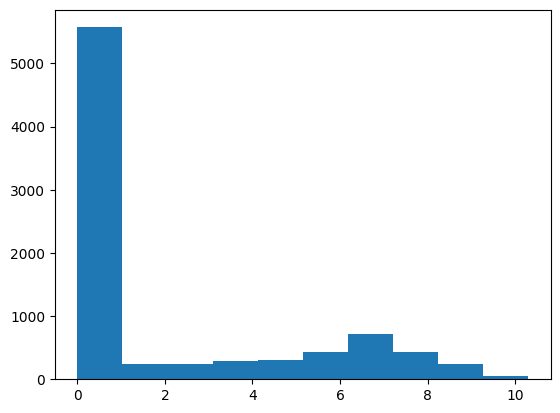

In [6]:
plt.hist(np.log1p(train_df['FoodCourt']))

In [7]:
temp = ColumnTransformer( 
    transformers=[ 
        ('imputer', SimpleImputer(strategy='median'), [2]), 
        ('transformer', PowerTransformer(method='yeo-johnson'), [2]), 
        ('scaler', StandardScaler(), [2])
    ] 
)

In [8]:
temp_col = train_df['RoomService']
temp_col

0         0.0
1       109.0
2        43.0
3         0.0
4       303.0
        ...  
8688      0.0
8689      0.0
8690      0.0
8691      0.0
8692    126.0
Name: RoomService, Length: 8693, dtype: float64

(array([[   0.,    0.,    0., 5656.,    0.,    0.,    0.,    0., 3037.,
            0.],
        [5439.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3037.],
        [5439.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3037.]]),
 array([-0.74724474, -0.5386953 , -0.33014586, -0.12159643,  0.08695301,
         0.29550245,  0.50405188,  0.71260132,  0.92115076,  1.1297002 ,
         1.33824963]),
 <a list of 3 BarContainer objects>)

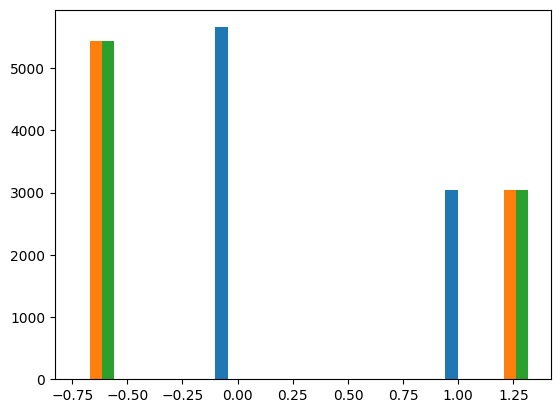

In [9]:
plt.hist(temp.fit_transform(train_df))

In [10]:
train_df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)

In [ ]:
X = train_df.drop(columns=['Transported'])
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [12]:
y = train_df['Transported']
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Making pipeline

In [14]:
num_cols = X_train.select_dtypes(include=['number'])
cat_cols = X_train.select_dtypes(include=['object'])

print(num_cols,'\n',cat_cols)

       Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck
2333  28.0          0.0       55.0           0.0  656.0     0.0
2589  17.0          0.0     1195.0          31.0    0.0     0.0
8302  28.0          0.0        0.0           0.0    0.0     0.0
8177  20.0          NaN        2.0         289.0  976.0     0.0
500   36.0          0.0        0.0           0.0    0.0     0.0
...    ...          ...        ...           ...    ...     ...
5734  18.0         14.0        2.0         144.0  610.0     0.0
5191  50.0        690.0        0.0          30.0  762.0   428.0
5390  22.0        158.0        0.0         476.0    0.0    26.0
860   34.0        379.0        0.0        1626.0    0.0     0.0
7270  28.0          7.0      489.0           0.0    4.0  6027.0

[6954 rows x 6 columns] 
      HomePlanet CryoSleep    Destination    VIP
2333      Earth     False    TRAPPIST-1e  False
2589      Earth     False    TRAPPIST-1e  False
8302     Europa      True    55 Cancri e  False
8177       Ma

In [15]:
num_pipe_yeo_johnson = Pipeline(
[
    ('impute', SimpleImputer(strategy='median')),
    ('transform', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler())
])
num_pipe_yeo_johnson_knn = Pipeline(
[
    ('impute', KNNImputer()),
    ('transform', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler())
])

In [16]:
num_pipe_log = Pipeline(
[
    ('impute', SimpleImputer(strategy='median')),
    ('transform', FunctionTransformer(func=np.log1p)),
    ('scale', StandardScaler())
])
num_pipe_log_knn = Pipeline(
[
    ('impute', KNNImputer()),
    ('transform', FunctionTransformer(func=np.log1p)),
    ('scale', StandardScaler())
])

In [17]:
cat_pipe = Pipeline(
[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

In [18]:
preprocessor = ColumnTransformer(
[
    ('numeric', num_pipe_log, [3, 5, 6, 7, 8, 9]),
    ('categorical', cat_pipe, [0, 1, 2, 4])
], remainder='passthrough')

preprocessor_knn = ColumnTransformer(
[
    ('numeric', num_pipe_log_knn, [3, 5, 6, 7, 8, 9]),
    ('categorical', cat_pipe, [0, 1, 2, 4])
], remainder='passthrough')

In [19]:
log_reg_pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [20]:
rf_pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=220, max_features=6, random_state=42))
])
rf_pipe_knn = Pipeline(
[
    ('preprocessor', preprocessor_knn),
    ('model', RandomForestClassifier(n_estimators=220, max_features=6, random_state=42))
])

In [21]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model',
                 RandomForestClassifier(max_features=6, n_estimators=220,
                                        random_state=42))])

In [22]:
rf_pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model',
                 RandomForestClassifier(max_features=6, n_estimators=220,
                                        random_state=42))])

In [23]:
Gradient_Boosting_pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(n_estimators=120, max_depth=4, learning_rate=0.158, random_state=42))
])
Gradient_Boosting_pipe_knn = Pipeline(
[
    ('preprocessor', preprocessor_knn),
    ('model', GradientBoostingClassifier(n_estimators=120, max_depth=4, learning_rate=0.158, random_state=42))
])

In [24]:
Gradient_Boosting_pipe_2 = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])
Gradient_Boosting_pipe_2_knn = Pipeline(
[
    ('preprocessor', preprocessor_knn),
    ('model', GradientBoostingClassifier())
])

In [23]:
Hist_Gradient_Boosting_pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingClassifier())
])

In [25]:
Gradient_Boosting_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.158, max_depth=4,
                                            n_estimators=120,
                                            random_state=42))])

In [26]:
Gradient_Boosting_pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.158, max_depth=4,
                                            n_estimators=120,
                                            random_state=42))])

In [27]:
Gradient_Boosting_pipe_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model', GradientBoostingClassifier())])

In [28]:
Gradient_Boosting_pipe_2_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model', GradientBoostingClassifier())])

In [29]:
y_pred_GB = Gradient_Boosting_pipe.predict(X_test)
y_pred_GB_knn = Gradient_Boosting_pipe_knn.predict(X_test)

In [30]:
y_pred_GB_2 = Gradient_Boosting_pipe_2.predict(X_test)
y_pred_GB_2_knn = Gradient_Boosting_pipe_2_knn.predict(X_test)

In [31]:
print(accuracy_score(y_test, y_pred_GB))
print(accuracy_score(y_test, y_pred_GB_knn))

print()

print(accuracy_score(y_test, y_pred_GB_2))
print(accuracy_score(y_test, y_pred_GB_2_knn))


0.7837837837837838
0.7832087406555491

0.7837837837837838
0.7786083956296722


In [29]:
accuracy_score(y_test, y_pred_GB_2)

0.7952846463484762

In [41]:
y_pred_rf = rf_pipe.predict(X_test)

In [42]:
y_pred_rf_knn = rf_pipe_knn.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf_knn))

0.7763082231167338
0.7786083956296722


In [34]:
test = pd.read_csv('test.csv')

In [35]:
test_id = test['PassengerId']
test_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [36]:
test.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)

In [37]:
test_pred_GB = Gradient_Boosting_pipe_2.predict(test)

In [38]:
result_GB = pd.DataFrame({'PassengerId': test_id, 'Transported': test_pred_GB})
result_GB

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [38]:
result_GB.to_csv('Gradient_Boosting_2.csv', index=False)

In [33]:
param_grid = [
    {'model__max_features': [2, 6, 10, 14, 18, 20],
    'model__n_estimators': [10, 30, 60, 100, 130, 150],
    }
]

In [34]:
grid_search_rf = GridSearchCV(rf_pipe, param_grid, cv=3, scoring='accuracy')

In [35]:
# grid_search_rf.fit(X_train, y_train)

In [36]:
# grid_search_rf.best_params_

In [37]:
new_param_distribs = [
    {'model__max_features': np.arange(1, 30, 5),
    'model__n_estimators': np.arange(100, 300, 15),}
]

In [38]:
rf_search = RandomizedSearchCV(rf_pipe, new_param_distribs, n_iter=10, cv=3, scoring='accuracy', random_state=42)

In [39]:
# rf_search.fit(X_train, y_train)

In [40]:
# rf_search.best_params_

In [49]:

num_pipe_log_knn_1 = Pipeline(
[
    ('impute', KNNImputer(n_neighbors=7, weights='uniform')),
    ('transform', FunctionTransformer(func=np.log1p)),
    ('scale', StandardScaler())
])

preprocessor_knn_1 = ColumnTransformer(
[
    ('numeric', num_pipe_log_knn_1, [3, 5, 6, 7, 8, 9]),
    ('categorical', cat_pipe, [0, 1, 2, 4])
], remainder='passthrough')


Gradient_Boosting_pipe_2_knn_1 = Pipeline(
[
    ('preprocessor', preprocessor_knn_1),
    ('model', GradientBoostingClassifier(n_estimators=80, max_depth=7, learning_rate=0.0523))
])


In [50]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(Gradient_Boosting_pipe_2_knn, X_train, y_train, cv=10, scoring='accuracy')

In [53]:
scores_1 = cross_val_score(Gradient_Boosting_pipe_2_knn_1, X_train, y_train, cv=10, scoring='accuracy')

In [54]:
print(scores)
print(scores_1)

[0.79310345 0.77155172 0.78735632 0.80890805 0.8028777  0.78992806
 0.8        0.77841727 0.8028777  0.80719424]
[0.79454023 0.7816092  0.78304598 0.80747126 0.78992806 0.78273381
 0.82158273 0.78417266 0.79568345 0.81294964]


In [55]:
Gradient_Boosting_pipe_2_knn_1.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.0523, max_depth=7,
                                            n_estimators=80))])

In [45]:
param_dist = {
    'preprocessor__numeric__impute__n_neighbors': np.arange(2, 10),
    'preprocessor__numeric__impute__weights': ['uniform', 'distance'], 
    'model__n_estimators': np.arange(80, 250, 40),
    'model__learning_rate': np.linspace(0.01, 0.2, 10),
    'model__max_depth': np.arange(3, 8)
}

In [46]:
GB_search = RandomizedSearchCV(Gradient_Boosting_pipe_2_knn, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [47]:
GB_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('impute',
                                                                                                KNNImputer()),
                                                                                               ('transform',
                                                                                                FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               [3,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9]),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_frequent...
                   param_distributions={'model__learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'model__max_depth': array([3, 4, 5, 6, 7]),
                                        'model__n_estimators': array([ 80, 120, 160, 200, 240]),
                                        'preprocessor__numeric__impute__n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'preprocessor__numeric__impute__weights': ['uniform',
                                                                                   'distance']},
                   random_state=42, scoring='accuracy')

In [48]:
GB_search.best_params_

{'preprocessor__numeric__impute__weights': 'uniform',
 'preprocessor__numeric__impute__n_neighbors': 7,
 'model__n_estimators': 80,
 'model__max_depth': 7,
 'model__learning_rate': 0.052222222222222225}

In [45]:
from xgboost import XGBClassifier

In [46]:
XGB_pipe = Pipeline(
[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(eval_metric='logloss'))
])

In [47]:
# XGB_pipe.fit(X_train, y_train)

In [48]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [49]:
class SklearnXGBClassifier(BaseEstimator, ClassifierMixin): 
    def __init__(self, **kwargs): 
        self.model = XGBClassifier(**kwargs) 
        
    def fit(self, X, y): 
        self.model.fit(X, y) 
        return self 
    
    def predict(self, X): 
        return self.model.predict(X) 
    
    def predict_proba(self, X): 
        return self.model.predict_proba(X) 
    
    def score(self, X, y): 
        return accuracy_score(y, self.predict(X))

In [50]:
XGB_pipe = Pipeline(
    steps=[ 
        ('preprocessor', preprocessor), 
        ('classifier', SklearnXGBClassifier(eval_metric='logloss')) # Custom wrapper 
    ]
)

In [51]:
XGB_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('classifier', SklearnXGBClassifier())])

In [52]:
y_pred_XGB = XGB_pipe.predict(X_test)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [53]:
accuracy_score(y_test, y_pred_XGB)

0.7809085681426107

In [54]:
test_pred_XBG = XGB_pipe.predict(test)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [32]:
Gradient_Boosting_pipe_2_knn.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9]),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [0, 1, 2, 4])])),
                ('model', GradientBoostingClassifier())])

In [56]:
test_pred_GB_knn = Gradient_Boosting_pipe_2_knn_1.predict(test)

In [57]:
# result_XGB = pd.DataFrame({'PassengerId': test_id, 'Transported': test_pred_XBG})
result_GB_knn = pd.DataFrame({'PassengerId': test_id, 'Transported': test_pred_GB_knn})
result_GB_knn

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [58]:
result_GB_knn.to_csv('Gradient_Boosting_Log_knn.csv', index=False)